## Example: Random Walks

Let simulate a random walk. The walk will be represented as a vector.

We'll do it first as loop, then with vectorization.

**Loops**

In [35]:
import random
position = 0
walk = [position] # initialize the walk
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1  # Coin toss
    position += step
    walk.append(position)

In [36]:
import matplotlib.pyplot as plt

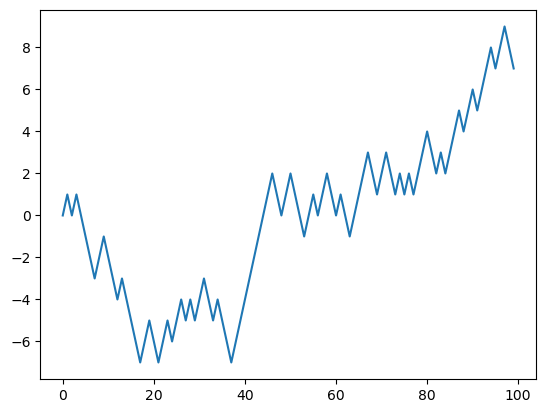

In [37]:
plt.figure()
plt.plot(walk[:100]);

**Vectors**

In [38]:
import numpy as np

In [39]:
np.random.seed(12345)

In [40]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk2 = steps.cumsum()

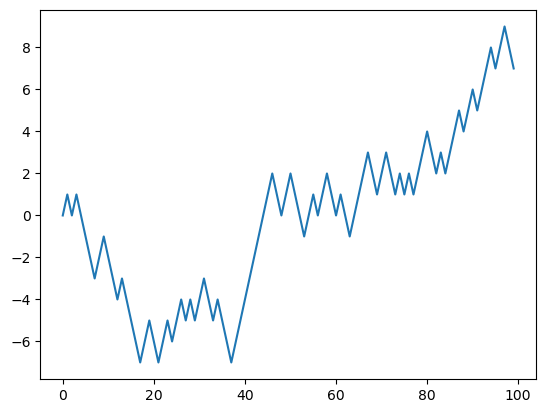

In [41]:
plt.plot(walk[:100]);

In [42]:
walk2.min(), walk2.max()

(-3, 31)

## Simulating Many Random Walks at Once

In [43]:
nwalks = 5000
nsteps = 1000

In [44]:
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [45]:
draws

array([[1, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [46]:
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [47]:
walks.max(), walks.min()

(138, -133)

In [48]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [49]:
hits30.sum() # Number that hit 30 or -30

3410

In [50]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [51]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))

Feel free to experiment with other distributions for the steps other than equal-sized coin flips. You need only use a different random generator method, like standard_normal to generate normally distributed steps with some mean and standard deviation:

In [52]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps)) # Walks: observations, Steps: features

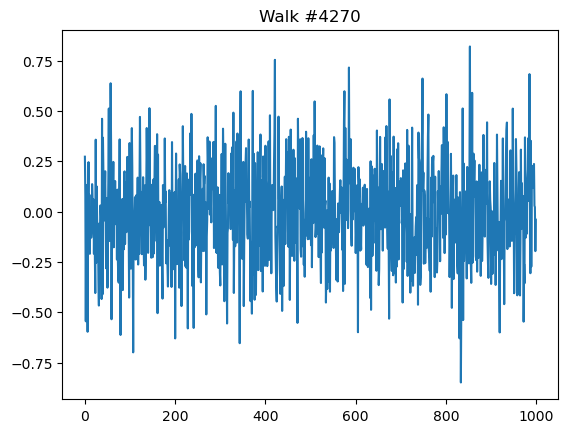

In [53]:
sample_walk = np.random.choice(len(draws))
plt.plot(draws[sample_walk])
plt.title(f"Walk #{sample_walk}");